In [124]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [101]:
record = pd.read_csv('DeliveryRecord.csv')

In [102]:
len(record['storeCode'].unique())

98

In [103]:
record['下單時間'] = record['下單時間'].apply(lambda x: x[11:13]+':01:00')
record['下單時間'] = pd.to_datetime(record['下單時間'])

In [104]:
storeHour = record.groupby(['storeCode','lat','lon','下單時間']).agg({'Rider':'count'}).reset_index()
storeHour.rename(columns={'下單時間':'OrderTime'},inplace=True)

In [105]:
maxIndex = storeHour.groupby(['storeCode']).agg({'Rider':'max'}).reset_index()
maxIndex['peakHour'] = 1
storeHour = storeHour.merge(maxIndex,on=['storeCode','Rider'],how='outer').fillna(0)

In [106]:
maxIndex.loc[maxIndex.storeCode=='PH31']

,storeCode,Rider,peakHour
38,PH31,70,1


In [107]:
def findBranch(x):
    if 'KFC' in x:
        return 'KFC'
    elif 'PHD' in x:
        return 'PHD'
    else:
        return 'PH'
    
storeHour['Branch'] = storeHour['storeCode'].apply(lambda x: findBranch(x))

In [108]:
storeHour.loc[storeHour.storeCode=='PH31']

,storeCode,lat,lon,OrderTime,Rider,peakHour,Branch
369,PH31,22.339911,114.155129,2020-11-02 11:01:00,8,0.0,PH
370,PH31,22.339911,114.155129,2020-11-02 14:01:00,8,0.0,PH
371,PH31,22.339911,114.155129,2020-11-02 12:01:00,13,0.0,PH
372,PH31,22.339911,114.155129,2020-11-02 13:01:00,16,0.0,PH
373,PH31,22.339911,114.155129,2020-11-02 21:01:00,16,0.0,PH
374,PH31,22.339911,114.155129,2020-11-02 15:01:00,5,0.0,PH
375,PH31,22.339911,114.155129,2020-11-02 22:01:00,5,0.0,PH
376,PH31,22.339911,114.155129,2020-11-02 16:01:00,10,0.0,PH
377,PH31,22.339911,114.155129,2020-11-02 17:01:00,45,0.0,PH
378,PH31,22.339911,114.155129,2020-11-02 18:01:00,70,1.0,PH


In [123]:
store = 'KFC'
print(store)
print('amount, ', len(storeHour.loc[(storeHour['Branch']==store)]['storeCode'].unique()))
storeHour.loc[(storeHour['Branch']==store)&(storeHour['peakHour']==1)].groupby(['OrderTime']).count()

KFC
amount,  14


,storeCode,lat,lon,Rider,peakHour,Branch
OrderTime,,,,,,
2020-11-02 11:01:00,3,3,3,3,3,3
2020-11-02 12:01:00,4,4,4,4,4,4
2020-11-02 13:01:00,1,1,1,1,1,1
2020-11-02 14:01:00,1,1,1,1,1,1
2020-11-02 17:01:00,1,1,1,1,1,1
2020-11-02 18:01:00,4,4,4,4,4,4
2020-11-02 19:01:00,3,3,3,3,3,3
2020-11-02 20:01:00,1,1,1,1,1,1


<BarContainer object of 8 artists>

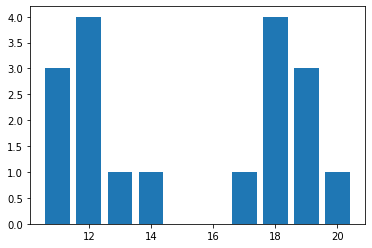

In [128]:
kfc = storeHour.loc[(storeHour['Branch']==store)&(storeHour['peakHour']==1)].\
        groupby(['OrderTime']).count().reset_index()
plt.bar(kfc['OrderTime'].dt.hour, kfc['storeCode'])

In [118]:
store = 'PHD'
print(store)
print('amount, ', len(storeHour.loc[(storeHour['Branch']==store)]['storeCode'].unique()))
storeHour.loc[(storeHour['Branch']==store)&(storeHour['peakHour']==1)].groupby(['OrderTime']).count()

PHD
amount,  26


,storeCode,lat,lon,Rider,peakHour,Branch
OrderTime,,,,,,
2020-11-02 17:01:00,1,1,1,1,1,1
2020-11-02 18:01:00,25,25,25,25,25,25


In [120]:
store = 'PH'
print(store)
print('amount, ', len(storeHour.loc[(storeHour['Branch']==store)]['storeCode'].unique()))
storeHour.loc[(storeHour['Branch']==store)&(storeHour['peakHour']==1)].groupby(['OrderTime']).count()

PH
amount,  58


,storeCode,lat,lon,Rider,peakHour,Branch
OrderTime,,,,,,
2020-11-02 17:01:00,7,7,7,7,7,7
2020-11-02 18:01:00,46,46,46,46,46,46
2020-11-02 19:01:00,5,5,5,5,5,5


In [109]:
storeHour.to_csv('storeHour.csv',index=False)